In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [14]:
df['Age'] = df['Age'].fillna(method='ffill').fillna(method='bfill')
print(df['Age'].isna().sum())
df['Age']

0


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [17]:
df['Cabin'] = df['Cabin'].fillna('unknown')
print(df['Cabin'].head())
print(df['Cabin'].isna().sum())


0    unknown
1        C85
2    unknown
3       C123
4    unknown
Name: Cabin, dtype: object
0


In [32]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [19]:
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S,1


In [22]:
scaler = StandardScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])
df.head()
print(df['Fare_scaled'].mean())
print(df['Fare_scaled'].std())

-4.37360585458395e-17
1.0005616400330462


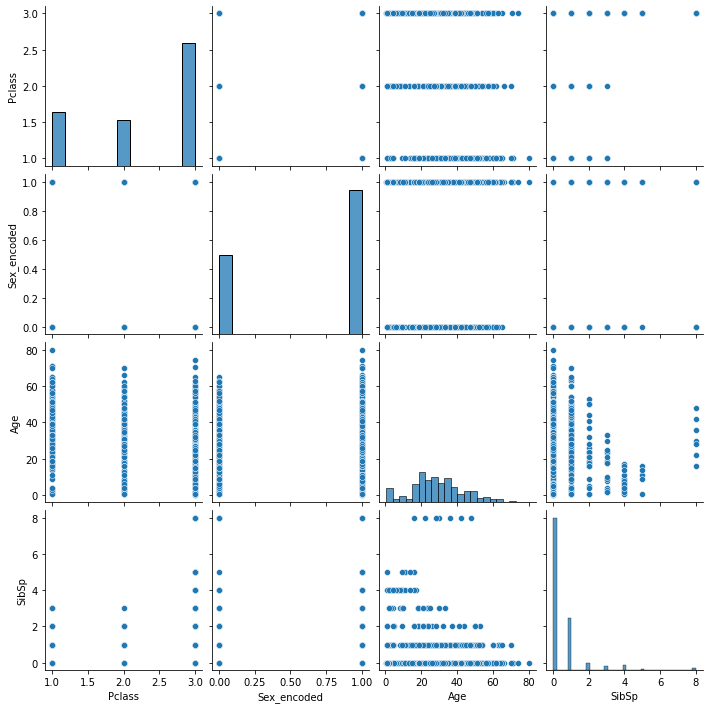

In [25]:
sns.pairplot(df[['Pclass', 'Sex_encoded', 'Age', 'SibSp']])
plt.show()

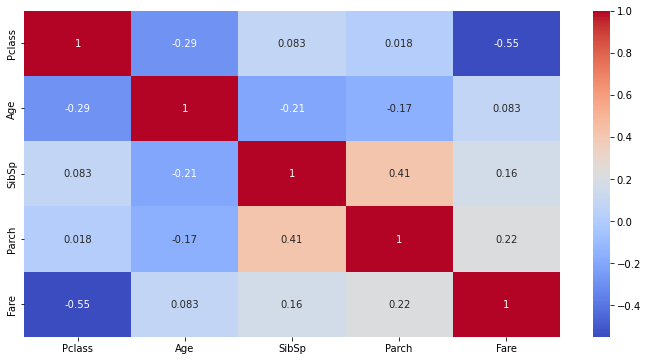

In [31]:
plt.figure(figsize=(12,6))
corr_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr = df[corr_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()